In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from sklearn.linear_model import LinearRegression

In [9]:
data = pd.read_csv('/content/1.02.+Multiple+linear+regression.csv')

In [10]:
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [11]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


<Axes: xlabel='SAT', ylabel='GPA'>

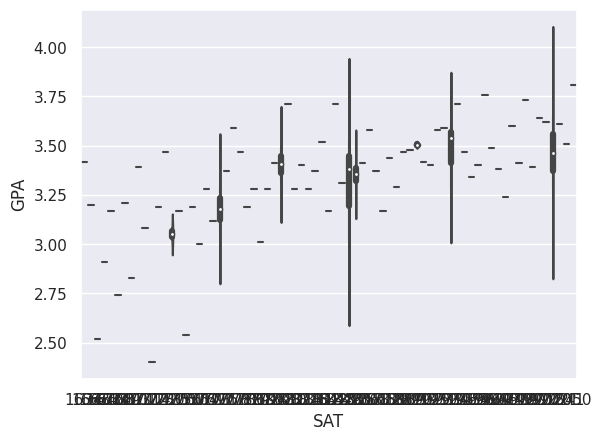

In [12]:
sns.violinplot(x='SAT', y='GPA', data=data)

<Axes: ylabel='Count'>

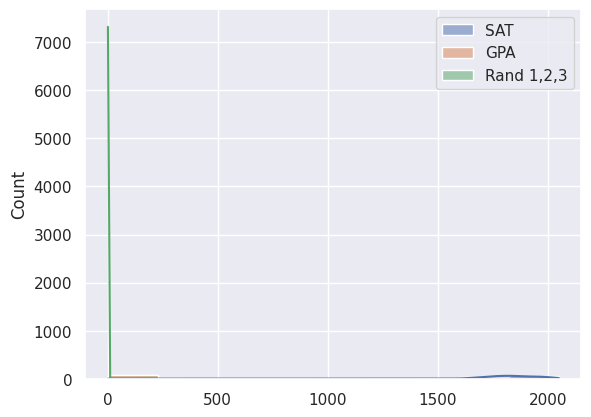

In [7]:
sns.histplot(data, kde=True)


In [13]:
X = data[['SAT', "Rand 1,2,3"]]
y = data['GPA']

In [14]:
reg = LinearRegression()

In [15]:
reg.fit(X, y)

LinearRegression()

In [16]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [17]:
reg.score(X, y)

0.4066811952814283

In [18]:
reg.intercept_

0.29603261264909486

### Formula for Adjasted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$



In [22]:
r2 = reg.score(X, y)
n = X.shape[0]
p = X.shape[1]

In [23]:
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

In [24]:
adj_r2

0.3920313482513401

In [25]:
from sklearn.feature_selection import f_regression

In [26]:
f_regression(X, y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [29]:
p_value = f_regression(X, y)[1]

In [30]:
p_value

array([7.19951844e-11, 6.76291372e-01])

In [31]:
p_value.round(3)

array([0.   , 0.676])

In [34]:
reg_summary = pd.DataFrame(data=X.columns.values, columns=['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [37]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_value.round(3)

In [38]:
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676
